<a href="https://colab.research.google.com/github/harshal164/BE-SEM-8-PROJECT/blob/master/mostly_final_Copy_of_editing_chinese_indian_harshal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/dataset/UTKFace_clean/

Mounted at /content/drive
/content/drive/My Drive/dataset/UTKFace_clean


In [2]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-5jf4c73b
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-5jf4c73b
  Created wheel for tensorflow-examples: filename=tensorflow_examples-32b67f3f42aaa1e11e9daf0a8a32e67cc8fb7579_-cp36-none-any.whl size=137311 sha256=134a991e17aba01353cf0917a3dd3c9834e86e5f89e20455a7ed1c9062f9004e
  Stored in directory: /tmp/pip-ephem-wheel-cache-qgh137g4/wheels/83/64/b3/4cfa02dc6f9d16bf7257892c6a7ec602cd7e0ff6ec4d7d714d
Successfully built tensorflow-examples


In [3]:
#import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from PIL import Image

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
BUFFER_SIZE = 1000
BATCH_SIZE =32 
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [5]:
def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image

In [6]:
# normalizing the images to [-1, 1]
def normalize(image):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  return image

In [7]:
def random_jitter(image):
  # resizing to 286 x 286 x 3
  image = tf.image.resize(image, [286, 286],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  # randomly cropping to 256 x 256 x 3
  image = random_crop(image)

  # random mirroring
  image = tf.image.random_flip_left_right(image)

  return image

In [8]:
def preprocess_image_train(image, label):
  image = random_jitter(image)
  image = normalize(image)
  return image

In [9]:
def preprocess_image_test(image, label):
  image = normalize(image)
  return image

In [10]:
import os

arr_1 = os.listdir('./2')
arr_2 = os.listdir('./3')
print(len(arr_1),len(arr_2))

dataset_size=min(len(arr_1),len(arr_2))


3431 3975


In [11]:
print(arr_1[:20])

['22_1_2_20170116172706771.jpg.chip.jpg', '22_1_2_20170116172707989.jpg.chip.jpg', '22_1_2_20170116172718234.jpg.chip.jpg', '22_1_2_20170116172713575.jpg.chip.jpg', '22_1_2_20170116172719532.jpg.chip.jpg', '22_1_2_20170116172726806.jpg.chip.jpg', '22_1_2_20170116184716890.jpg.chip.jpg', '22_1_2_20170116172741591.jpg.chip.jpg', '22_1_2_20170116220943302.jpg.chip.jpg', '1_0_2_20161219140525218.jpg.chip.jpg', '1_0_2_20161219140530307.jpg.chip.jpg', '1_0_2_20161219140540938.jpg.chip.jpg', '1_0_2_20161219140744200.jpg.chip.jpg', '1_0_2_20161219140748280.jpg.chip.jpg', '1_0_2_20161219140756601.jpg.chip.jpg', '1_0_2_20161219140811232.jpg.chip.jpg', '1_0_2_20161219140913256.jpg.chip.jpg', '1_0_2_20161219140929864.jpg.chip.jpg', '1_0_2_20161219140952943.jpg.chip.jpg', '1_0_2_20161219141023272.jpg.chip.jpg']


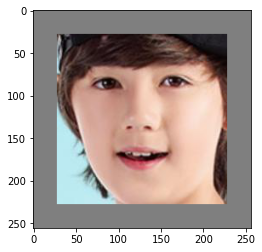

In [13]:

def pad3D(c_x, padlen=28):
      m,n,r = c_x.shape
      c_y = np.zeros((m+2*padlen, n+2*padlen, r),dtype=float)
      c_y[padlen:-padlen, padlen:-padlen, :] = c_x
      return c_y


sample_name="25_0_2_20170119145148646.jpg.chip.jpg"
s1="70_0_2_20161219160529735.jpg.chip.jpg"
s2="62_1_2_20170105174732894.jpg.chip.jpg"
s3="59_0_2_20170104022521749.jpg.chip.jpg"
s4="39_1_2_20170108225357064.jpg.chip.jpg"
s5="38_0_2_20170116172828624.jpg.chip.jpg"
s6="16_0_2_20170110232739283.jpg.chip.jpg"
sample_image_domain_1 = pad3D(normalize(np.array(Image.open('2/'+s6))))
#sample_image_domain_1 = pad3D(normalize(np.array(Image.open('cropped.jpeg'))))
  # img_white = (np.array(img_white))
    
  

plt.imshow(sample_image_domain_1*0.5+0.5)

In [14]:

from PIL import Image
import numpy as np







modified_domain_1=None
def get_ready_dataset(start_pos=0):
  global modified_domain_1






  domain_1=[]
  for i in range(start_pos,start_pos+50):
    img_white = np.array(Image.open('2/'+arr_1[i]))

  # img_white = (np.array(img_white))
    
    domain_1.append(img_white)
  domain_1=np.array(domain_1)
  print(domain_1.shape)
  #print(domain_1.shape)



  domain_2=[]
  for i in range(start_pos,start_pos+50):
    img_black =  np.array(Image.open('3/'+arr_2[i]))
    img_black = np.array(img_black)
    domain_2.append(img_black)
  domain_2=np.array(domain_2)



  def pad3D(c_x, padlen=28):
      m,n,r = c_x.shape
      c_y = np.zeros((m+2*padlen, n+2*padlen, r),dtype=float)
      c_y[padlen:-padlen, padlen:-padlen, :] = c_x
      return c_y

  modified_domain_1=[]
  modified_domain_2=[]
  print(domain_1[2].shape)

  for sample in range(50):
    modified_domain_1.append(pad3D(normalize(domain_1[sample])))




  for sample in range(len(domain_2)):
    modified_domain_2.append(pad3D(normalize(domain_2[sample])))


  modified_domain_1=np.array(modified_domain_1)
  modified_domain_2=np.array(modified_domain_2)







  domain_1_tensor=tf.convert_to_tensor(
      modified_domain_1, dtype=tf.float32)
  domain_2_tensor=tf.convert_to_tensor(
      modified_domain_2, dtype=tf.float32)



  dataset1 = tf.data.Dataset.from_tensor_slices(domain_1_tensor)
  # Emits data of 10, 11, 12, 13, 14, (One element at a time)

  dataset2 = tf.data.Dataset.from_tensor_slices(domain_2_tensor)
  # Emits data of (30, 60), (33, 62), (36, 64), (39, 66), (42, 68)
  # Emits one tuple at a time

  dataset1 = dataset2.batch(2)
  dataset2 = dataset2.batch(2)
  print(dataset2)

  return dataset1,dataset2

In [15]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

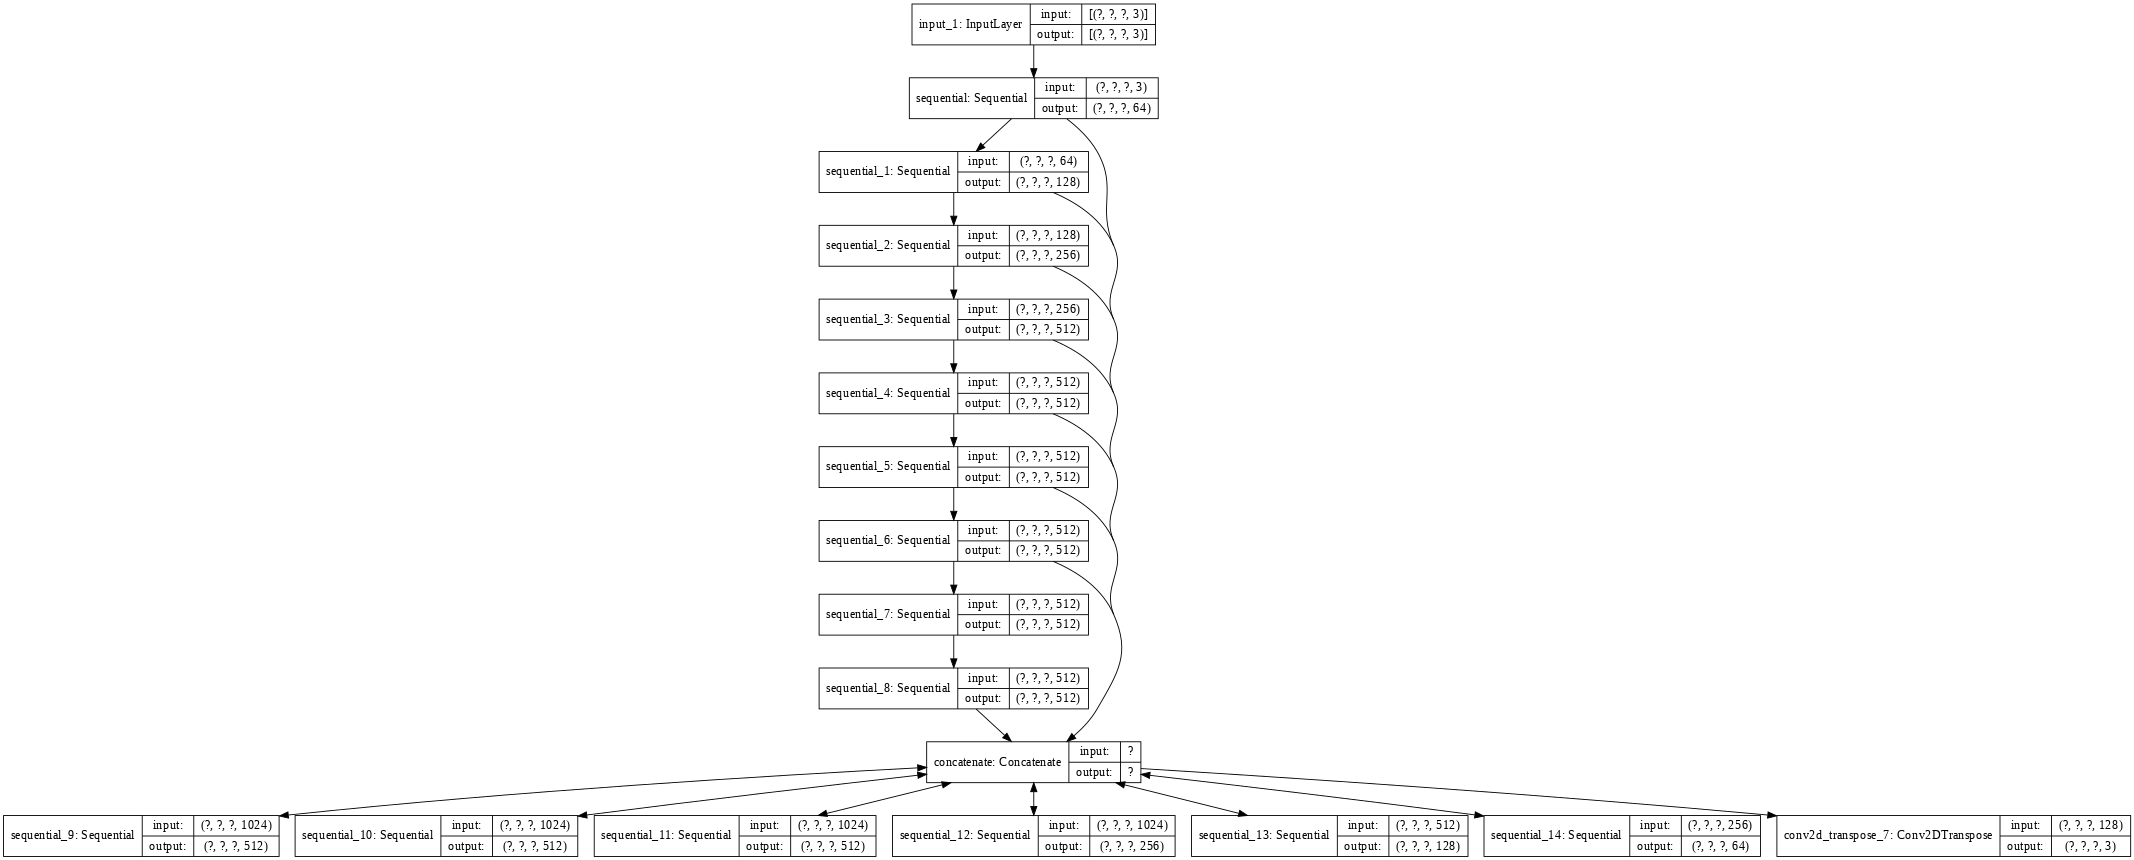

In [16]:

tf.keras.utils.plot_model(generator_g, show_shapes=True, dpi=64)

In [17]:
LAMBDA = 7

In [18]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [19]:
def discriminator_loss(real, generated):
  real_loss = loss_obj(tf.ones_like(real), real)

  generated_loss = loss_obj(tf.zeros_like(generated), generated)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss * 0.5

In [20]:
def generator_loss(generated):
  return loss_obj(tf.ones_like(generated), generated)

In [21]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
  
  return LAMBDA * loss1

In [22]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  return LAMBDA * 0.2 * loss

In [23]:
generator_g_optimizer = tf.keras.optimizers.Adam(9e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(9e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(9e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(9e-4, beta_1=0.5)

In [24]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=50)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [25]:
print(ckpt_manager.latest_checkpoint)

./checkpoints/train/ckpt-1841


In [26]:
EPOCHS =3

In [27]:
op_gif=[]
def generate_images(model, test_input):
  global op_gif
  prediction = model(test_input)
  op_gif.append(prediction)
  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [28]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape:
    # Generator G translates X -> Y
    # Generator F translates Y -> X.
    
    fake_y = generator_g(real_x, training=True)
    cycled_x = generator_f(fake_y, training=True)

    fake_x = generator_f(real_y, training=True)
    cycled_y = generator_g(fake_x, training=True)

    # same_x and same_y are used for identity loss.
    same_x = generator_f(real_x, training=True)
    same_y = generator_g(real_y, training=True)

    disc_real_x = discriminator_x(real_x, training=True)
    disc_real_y = discriminator_y(real_y, training=True)

    disc_fake_x = discriminator_x(fake_x, training=True)
    disc_fake_y = discriminator_y(fake_y, training=True)

    # calculate the loss
    gen_g_loss = generator_loss(disc_fake_y)
    gen_f_loss = generator_loss(disc_fake_x)
    
    total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
    
    # Total generator loss = adversarial loss + cycle loss
    total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
    total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

    disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)
  
  # Calculate the gradients for generator and discriminator
  generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                        generator_g.trainable_variables)
  generator_f_gradients = tape.gradient(total_gen_f_loss, 
                                        generator_f.trainable_variables)
  
  discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
  discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables)
  
  # Apply the gradients to the optimizer
  generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                            generator_g.trainable_variables))

  generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
                                            generator_f.trainable_variables))
  
  discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))
  
  discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

In [ ]:


for epoch in range(EPOCHS):
  for idx in range(dataset_size//2,dataset_size-50,50):
    print("dataset :::::, ",idx,"  epoch---->",epoch+1)
    dataset1,dataset2=get_ready_dataset(idx)

  
    start = time.time()

    n = 0
    for image_x, image_y in tf.data.Dataset.zip((dataset1, dataset2)):
      train_step(image_x, image_y)
      if n % 10 == 0:
        print ('.', end='')
      n+=1

    clear_output(wait=True)
    # Using a consistent image (sample_horse) so that the progress of the model
    # is clearly visible.
    generate_images(generator_g, sample_image_domain_1.reshape(1,256,256,3))

    if (epoch + idx) % 5 == 0:
      ckpt_save_path = ckpt_manager.save()
      print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                          ckpt_save_path))

    print ('Time taken for batch {} is {} sec\n'.format(idx + 1,
                                                        time.time()-start))

dataset :::::,  1715   epoch----> 1
(50, 200, 200, 3)
(200, 200, 3)
<BatchDataset shapes: (None, 256, 256, 3), types: tf.float32>
..

In [ ]:
print(len(op_gif))
op_gif=op_gif[:min(50,len(op_gif))]
print(type(op_gif),type(op_gif[1]))




from IPython.display import HTML
import matplotlib.animation as animation
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.array(i).reshape(256,256,3)*0.5+0.5, animated=True)] for i in op_gif]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

In [ ]:
import datetime
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='harshal'), bitrate=1800)

n=str(datetime.datetime.now())+'.mp4'
ani.save(n, writer=writer)
print("saved")

## Generate using test dataset

In [ ]:
!ls

In [ ]:
plt.subplot(121)
plt.imshow((np.array(sample_image_domain_1).reshape(256,256,3)) * 0.5 + 0.5)

plt.subplot(122)
plt.imshow((np.array(op_gif[1]).reshape(256,256,3)) * 0.5 + 0.5)

In [ ]:
# Run the trained model on the test dataset
for inp in modified_domain_1[99:100]:
  plt.subplot(121)
  plt.imshow((np.array(modified_domain_1[inp]).reshape(256,256,3)) * 0.5 + 0.5)
  plt.subplot(122)
  generate_images(generator_g, inp.reshape(1,256,256,3))